In [1]:
import numpy as np
import scipy as sp
import scipy.linalg
import scipy.sparse
import warnings
import time
import h5py
import sys
import os
from scipy.integrate import solve_ivp
from scipy.integrate import DOP853
from scipy.sparse.linalg import expm_multiply
from datetime import datetime
import matplotlib.pyplot as plt
#matplotlib.rc('font', **font)
cstring = 'rgbcmyk'
import matplotlib as ml
%matplotlib inline
font = {'family' : 'Sans',
        'weight' : 'normal',
        'size'   : 16}
ml.rc('font', **font)
ml.rcParams['figure.figsize'] = (8.0, 5.0)
ml.rcParams['text.usetex'] =False
ml.rc('font', family='serif',size=16)

In [2]:
mmax = 40
m0 = 0
ml1 = np.arange(-mmax, mmax, 2)
ml2 = np.arange(-mmax + 1, mmax, 2)
size = ml1.shape[0]
diag = np.eye(size)
nondiag = np.diag(np.ones(size - 1),k=1) + np.diag(np.ones(size - 1),k=-1)

In [3]:
def It(I0, t0, tau, t):
    return I0 * np.exp(-4*np.log(2) * ((t - t0) / tau)**2)

def ftD(ti, t, ct, dt, step, ml, B, I0, t0, tau, dal, alp, gamma):
    trange = np.arange(ti, t, dt)
    res = np.zeros((int(trange.shape[0]/step), ct.shape[0]), dtype=complex)
    res[0] = ct
    for it, tl in enumerate(trange[1:]):
        if (np.abs(tl - t0) > 1.5 * tau):
            ctc = np.exp(-B*ml**2* dt * 1j)*ct
        else:
            Il = It(I0, t0, tau, tl)
            Hkin = np.diag(ml**2)
            Hmat = B*Hkin - Il * (alp + 0.5 * dal * np.cos(gamma)**2) * diag - (Il * dal * np.cos(gamma)**2 / 4) * nondiag
            w,v = np.linalg.eigh(Hmat)
            ctc = np.dot(v, np.exp(-w*dt*1j) * np.dot(np.conj(v.T), ct))
        if it % step == 0:
            res[(it+1)//step] = ctc.copy()
        ct = ctc.copy()
    return trange[::step],res

## Parameters for Na2

In [34]:
I0 = 4.4*1e-2#5*1e-2
B = 1.33 * 2 * np.pi *1e-3
cons = 2 * np.pi / (3 * 1.05)
Ir = cons * I0
ti = -2.0
t0 = 0.0
tau = 1.0
tmax = 1200.05
dal = 32#32.126
alp = 41.225
#dal = 32.09
#alp = 41.183
T = 0.38
Ta = 1.38*T*0.1 / 1.05
DB = 0.05 * 2 * np.pi *1e-3
sB = DB / (2*np.sqrt(2*np.log(2)))

In [9]:
(495-278.2)*0.5291772109**3#0.1481847093

32.12644544661852

## Singlet

In [4]:
I0 = 6.67*1e-2
B = 4.64 * 2 * np.pi *1e-3 #3.62
cons = 2 * np.pi / (3 * 1.05)
Ir = cons * I0
ti = -20.0
t0 = 0.0
tau = 0.67
tmax = 600.05
dal = 26.5
alp = 29.578
T = 0.38
Ta = 1.38*T*0.1 / 1.05

## Parameters for Li2

In [54]:
I0 = 7.4*1e-2
B = 6.1 * 2 * np.pi *1e-3
cons = 2 * np.pi / (3 * 1.05)
Ir = cons * I0
ti=-2.0
t0 = 0.0
tau = 1.0
tmax = 400
dal = 66.4
alp = 37.3
T = 0.38
Ta = 1.38*T*0.1 / 1.05

## Parameters for K2

In [4]:
I0 = 2.59*1e-2 #1.26*1e-1
B = 0.69 * 2 * np.pi *1e-3
cons = 2 * np.pi / (3 * 1.05)
Ir = cons * I0
ti=-20.0
t0 = 0.0
tau = 0.55
tmax = 1200.01
dal = 71#70.92
alp = 70.73
T = 0.38
Ta = 1.38*T*0.1 / 1.05

## Parameters for K2 Singlet

In [19]:
I0 = 4.2*1e-2
B = 1.68 * 2 * np.pi *1e-3
cons = 2 * np.pi / (3 * 1.05)
Ir = cons * I0
ti = -20.0
t0 = 0.0
tau = 0.76
tmax = 600.05
dal = 51.66
alp = 53.29
T = 0.38
Ta = 1.38*T*0.1 / 1.05

## Parameters for Rb2

In [4]:
I0 = 2*1e-1
B = 0.317 * 2 * np.pi *1e-3
cons = 2 * np.pi / (3 * 1.05)
Ir = cons * I0
ti=-2.0
t0 = 0.0
tau = 0.8
tmax = 3600.01
dal = 75.34
alp = 75.28
T = 0.38
Ta = 1.38*T*0.1 / 1.05

In [8]:
(508.0)*0.1481847093

75.2778323244

OMP: Info #268: OMP_NESTED variable deprecated, please use OMP_MAX_ACTIVE_LEVELS instead.


Text(0, 0.5, 'Population (\\%)')

OMP: Info #268: OMP_NESTED variable deprecated, please use OMP_MAX_ACTIVE_LEVELS instead.
OMP: Info #268: OMP_NESTED variable deprecated, please use OMP_MAX_ACTIVE_LEVELS instead.
OMP: Info #268: OMP_NESTED variable deprecated, please use OMP_MAX_ACTIVE_LEVELS instead.
OMP: Info #268: OMP_NESTED variable deprecated, please use OMP_MAX_ACTIVE_LEVELS instead.


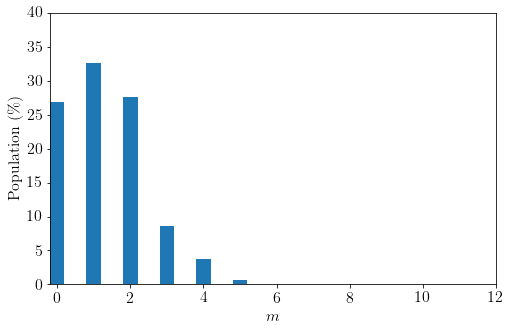

In [5]:
ml.rcParams['figure.figsize'] = (8.0, 5.0)
mlt = np.arange(0, mmax)
deg = 2 * np.ones(mlt.shape)
deg[0] = 1
#mult = np.tile(np.array([5/8,3/8]), mmax//2)
mult = np.tile(np.array([21/36,15/36]), mmax//2)
plt.bar(mlt, 100*deg*mult * np.exp(-B*mlt**2/Ta)/np.sum(deg*mult*np.exp(-B*mlt**2/Ta)), width=0.4)
plt.xlim([-0.2,12])
plt.ylim([0,40])
plt.xlabel(r'$m$')
plt.ylabel(r'Population (\%)')
#plt.savefig("K2Population.png", dpi=200)

In [5]:
dt = 0.1
step = 1

In [6]:
ct0 = np.zeros(mmax, dtype=complex)
cosMat = 0.5 * diag + 0.25 * nondiag

## Simple dynamics with temperature averaging

In [7]:
def getCos(Bl, Il):
    mlmax = 12
    mlt = np.arange(0, mlmax)
    deg = 2 * np.ones(mlt.shape)
    deg[0] = 1
    #mult = np.tile(np.array([5/8,3/8]), mlmax//2)
    mult = np.tile(np.array([3/8,5/8]), mlmax//2)
    #mult = np.tile(np.array([21/36,15/36]), mlmax//2)
    prob = deg * mult * np.exp(-Bl*mlt**2/Ta)/np.sum(deg * mult*np.exp(-Bl*mlt**2/Ta))
    zl = []
    for i in range(mlmax):
        ctl0 = ct0.copy()
        ctl0[mmax// 2 + i//2] = 1.0
        if i%2==0:
            ctr = ftD(ti, tmax, ctl0, dt, step, ml1, Bl, Il, t0, tau, dal, alp, 0.0)
        else:
            ctr = ftD(ti, tmax, ctl0, dt, step, ml2, Bl, Il, t0, tau, dal, alp, 0.0)
        zd1 = np.dot(cosMat, ctr[1].T)
        z1 = np.real(np.array([np.dot(np.conj(ctr[1][il]), zd1[:,il]) for il in range(ctr[1].shape[0])]))
        zl.append(z1)
    return np.dot(prob[:mlmax], np.array(zl))

In [9]:
def getCosNo(Bl, Il):
    mlmax = 12
    mlt = np.arange(0, mlmax)
    deg = 2 * np.ones(mlt.shape)
    deg[0] = 1
    mult = np.tile(np.array([1/2,1/2]), mlmax//2)
    #mult = np.tile(np.array([21/36,15/36]), mlmax//2)
    prob = deg * mult * np.exp(-Bl*mlt**2/Ta)/np.sum(deg * mult*np.exp(-Bl*mlt**2/Ta))
    zl = []
    for i in range(mlmax):
        ctl0 = ct0.copy()
        ctl0[mmax// 2 + i//2] = 1.0
        if i%2==0:
            ctr = ftD(ti, tmax, ctl0, dt, step, ml1, Bl, Il, t0, tau, dal, alp, 0.0)
        else:
            ctr = ftD(ti, tmax, ctl0, dt, step, ml2, Bl, Il, t0, tau, dal, alp, 0.0)
        zd1 = np.dot(cosMat, ctr[1].T)
        z1 = np.real(np.array([np.dot(np.conj(ctr[1][il]), zd1[:,il]) for il in range(ctr[1].shape[0])]))
        zl.append(z1)
    return np.dot(prob[:mlmax], np.array(zl))

In [13]:
def getCosK2(Bl, Il):
    al_39 = getCos(Bl, Il)
    al_41 = getCosNo(Bl, Il)
    return (0.87*al_39+0.125*al_41)/0.995

## Angular averaging

In [12]:
from scipy.integrate import quad
def IntCosSq(mp, m, alpha):
    return (1/(2*np.pi)) *(quad(lambda phi: np.cos((m-mp) * phi) * (np.sin(alpha)**2 * np.cos(phi)**2) / (1-np.cos(alpha)**2*np.cos(phi)**2+1e-8), 0, 2 * np.pi)[0]+
                           quad(lambda phi: np.sin((m-mp) * phi) * (np.sin(alpha)**2 * np.cos(phi)**2) / (1-np.cos(alpha)**2*np.cos(phi)**2+1e-8), 0, 2 * np.pi)[0]*1j)
def IntCosSqExp(m, alpha):
    return (1/(2*np.pi)) *(quad(lambda phi: np.cos(m * phi) * (np.sin(alpha)**2 * np.cos(phi)**2) / (1-np.cos(alpha)**2*np.cos(phi)**2+1e-8), 0, 2 * np.pi)[0]-
                           quad(lambda phi: np.sin(m * phi) * (np.sin(alpha)**2 * np.cos(phi)**2) / (1-np.cos(alpha)**2*np.cos(phi)**2+1e-8), 0, 2 * np.pi)[0]*1j)

In [14]:
IntCosSqExp(2, 0.1)

(0.08253190193593317+1.6247921113860274e-17j)

In [19]:
Ndiv = 50
allist = np.linspace(0, np.pi, Ndiv, endpoint=False)
cosFMatEx = np.zeros((Ndiv, len(ml1)), dtype=complex)
for i in range(Ndiv):
    for mli in range(len(ml1)):
        cosFMatEx[i, mli] = IntCosSqExp(ml1[mli], allist[i])
cosFMat = np.zeros((Ndiv, len(ml1), len(ml1)), dtype=complex)
for i in range(Ndiv):
    for mli in range(len(ml1)):
        for mlip in range(mli, len(ml1)):
            cosFMat[i, mlip, mli] = cosFMatEx[i, len(ml1)//2 + mlip - mli] if mlip - mli < len(ml1) // 2 else 0.0
    cosFMat[i] = np.conj(cosFMat[i].T) + cosFMat[i] - np.diag(np.diagonal(cosFMat[i]))    

In [44]:
from multiprocessing import Pool

def getCosAng(ind):
    mlmax = 12
    mlt = np.arange(0, mlmax)
    deg = 2 * np.ones(mlt.shape)
    deg[0] = 1
    #mult = np.tile(np.array([5/8,3/8]), mlmax//2)
    mult = np.tile(np.array([3/8,5/8]), mlmax//2)
    prob = deg * mult * np.exp(-B*mlt**2/Ta)/np.sum(deg * mult*np.exp(-B*mlt**2/Ta))
    zl = []
    for i in range(mlmax):
        ctl0 = ct0.copy()
        ctl0[mmax// 2 + i//2] = 1.0
        if i%2==0:
            ctr = ftD(ti, tmax, ctl0, dt, step, ml1, B, Ir, t0, tau, dal, alp, 0.5 * np.pi - allist[ind])
        else:
            ctr = ftD(ti, tmax, ctl0, dt, step, ml2, B, Ir, t0, tau, dal, alp, 0.5 * np.pi - allist[ind])
        zd1 = np.dot(np.real(cosFMat[ind]), ctr[1].T)
        z1 = np.real(np.array([np.dot(np.conj(ctr[1][il]), zd1[:,il]) for il in range(ctr[1].shape[0])]))
        zl.append(z1)
    return np.dot(prob[:mlmax], np.array(zl))

def getCosAngAv():
    pool = Pool(processes=4)
    cos2d = np.array(pool.map(getCosAng, np.arange(len(allist))))
    cos2dAv = np.dot(np.sin(allist), cos2d)/np.sum(np.sin(allist))
    return cos2dAv

## Focal averaging

In [8]:
#from multiprocessing import Pool

omk = 93
omp = 25
shells = 11

def getCosl(Il):
        return getCos(B, Il)

def getCosFA():
    dl = 1.7 / shells
    l =  0.5 * (2 * np.arange(shells) + 1) * dl
    Ilist = Ir * np.exp(-2 * l**2 * (omp / omk)**2)
    DetProb = np.exp(-2 * l**2) * l
    #pool = Pool(processes=4)
    zl = np.array(list(map(getCosl, Ilist)))
    #zl = pool.map(getCosl, Ilist)
    return np.dot(DetProb, np.array(zl))/np.sum(DetProb)

In [12]:
def f(x):
    return x**2

nk = np.linspace(0,2,10)
np.array(list(map(f, nk)))

array([0.        , 0.04938272, 0.19753086, 0.44444444, 0.79012346,
       1.2345679 , 1.77777778, 2.41975309, 3.16049383, 4.        ])

## Inhomogenous boradening

In [32]:
from multiprocessing import Pool
Bmin = 1.28 * 2 * np.pi *1e-3
Bmax = 1.38 * 2 * np.pi *1e-3

def getCosl(Bl):
        return getCos(Bl, Ir)

def getCosIB():
    div = 400
    Blt = np.random.normal(B,sB,400)#np.linspace(Bmin, Bmax, div)
    pool = Pool(processes=4)
    cos2d = np.array(pool.map(getCos, Blt))
    return np.sum(cos2d, axis = 0) / div

(array([  1.,   0.,   0.,   4.,   3.,   3.,   4.,   9.,  22.,  53.,  53.,
         79.,  98., 114., 123., 154., 167., 179., 154., 144., 169., 134.,
        105.,  57.,  65.,  46.,  27.,  15.,   5.,   8.,   2.,   3.]),
 array([1.16589871, 1.17520682, 1.18451492, 1.19382303, 1.20313113,
        1.21243924, 1.22174734, 1.23105544, 1.24036355, 1.24967165,
        1.25897976, 1.26828786, 1.27759597, 1.28690407, 1.29621217,
        1.30552028, 1.31482838, 1.32413649, 1.33344459, 1.3427527 ,
        1.3520608 , 1.36136891, 1.37067701, 1.37998511, 1.38929322,
        1.39860132, 1.40790943, 1.41721753, 1.42652564, 1.43583374,
        1.44514184, 1.45444995, 1.46375805]),
 <BarContainer object of 32 artists>)

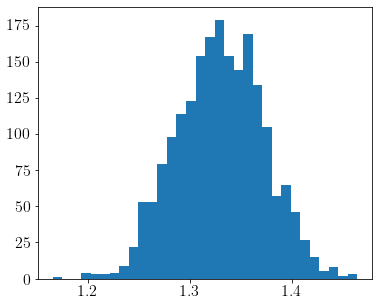

In [38]:
Bv=np.random.normal(B,sB,2000)/(2 * np.pi *1e-3)
plt.hist(Bv, bins='auto')

In [9]:
ctr = getCosFA()

In [12]:
ctrc = getCosK2(B, Ir)

In [11]:
trange = np.arange(ti, tmax, dt)
trange = trange[::step]

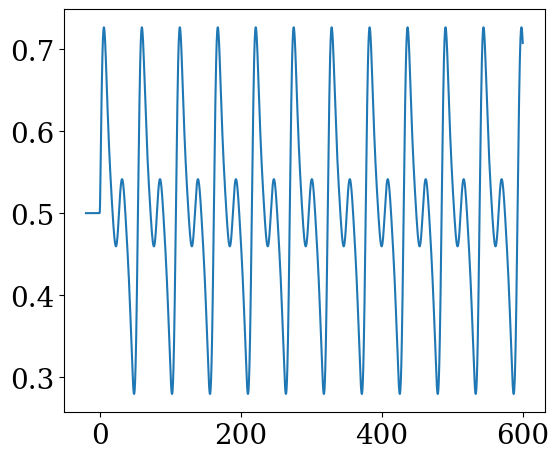

In [12]:
#cos2dAv = ctr1
ml.rc('font', family='serif',size=20)
ml.rcParams['figure.figsize'] = (6.0, 5.0)
f, ax1 = plt.subplots(1, 1)
#ax1.set_xlim([400,600])
#ax1.set_ylim([0.25,0.8])
ax1.plot(trange, ctr)
#ax1.plot(trange, ctrc)
#ax1.plot(trange, ctr)
#ax1.plot(actr0[:,1],actr0[:,2])
#ax1.plot(actr1[:,1],actr1[:,2])
#ax1.plot(actr2[:,1],actr2[:,2])
#ax1.set_ylabel(r'$\langle\cos^2\theta_\mathrm{2D}\rangle$')
#ax1.set_xlabel(r't (ps)')
#ax1.set_title(r'$I=5\times10^{10} \,\mathrm{W/cm^2}$')
plt.tight_layout()
#plt.savefig("Rb2D.pdf", dpi=200)

In [39]:
np.linalg.norm(ctr-actr0[:,2])

2.5197923048364816

In [26]:
actr0[:,2]

array([0.5       , 0.5       , 0.5       , ..., 0.50857666, 0.50845696,
       0.50833854])

In [28]:
actr = np.array([trange, ctr]).T

In [13]:
import pandas as pd
actr = np.array([trange, ctr]).T
pf = pd.DataFrame(actr[::])
pf.to_csv("./Na2DSingletB4.64I6.67e10.csv")

In [71]:
inda = np.arange(len(trange)) / len(trange)
dta = trange[1]-trange[0]
actr = np.array([inda*1e3/(dta), np.abs(np.fft.ifft(ctr1-np.mean(ctr1)))**2]).T

In [44]:
pf = pd.DataFrame(actr[::])
pf.to_csv("Fig10.csv")

In [70]:
import pandas as pd
Br = np.arange(0.6,0.67,0.01)
actrl = np.zeros((8, 8201, 3))
for i, Br_loc in enumerate(Br):
    actrl[i]=pd.read_csv(f"/home/aghazary/Documents/MyWorks/Austria/LaserMoleculeCoupling/Code/CalcPRA/K2DB{Br_loc:.2f}.csv").to_numpy()

In [3]:
import pandas as pd
actr=pd.read_csv("./K3DB0.67I2.59e10WFA.csv")
actr0=actr.to_numpy()
actr=pd.read_csv("./K2DB0.69I2.59e10.csv")
actr1=actr.to_numpy()
actr=pd.read_csv("./K3DWithUInhomogenousB0.66D0.02I2.59e10WFA.csv")
actr2=actr.to_numpy()
#actr01=actr1.to_numpy()

In [68]:
Br = np.arange(0.6,0.67,0.01)
actr0.shape

(8201, 3)

OMP: Info #268: OMP_NESTED variable deprecated, please use OMP_MAX_ACTIVE_LEVELS instead.
OMP: Info #268: OMP_NESTED variable deprecated, please use OMP_MAX_ACTIVE_LEVELS instead.
OMP: Info #268: OMP_NESTED variable deprecated, please use OMP_MAX_ACTIVE_LEVELS instead.
OMP: Info #268: OMP_NESTED variable deprecated, please use OMP_MAX_ACTIVE_LEVELS instead.


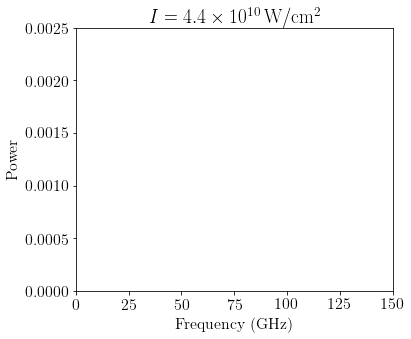

In [14]:
#cos2dAv = ctr1
ml.rcParams['figure.figsize'] = (6.0, 5.0)
f, ax1 = plt.subplots(1, 1)
inda = np.arange(len(trange)) / len(trange)
dta = trange[1]-trange[0]
#ax1.plot(inda*1e3/dta,np.abs(np.fft.ifft(cos2dAv-np.mean(cos2dAv)))**2)
ax1.plot(actr0[:,1],actr0[:,2])
ax1.set_xlim([0,150])
ax1.set_ylim([0,2.5e-3])
ax1.set_xlabel('Frequency (GHz)')
ax1.set_ylabel('Power')
ax1.set_title(r'$I=4.4\times10^{10} \,\mathrm{W/cm^2}$')
plt.tight_layout()
#plt.savefig("Na2S00442DB2MatchF.png", dpi=200)

In [10]:
tdec = 180

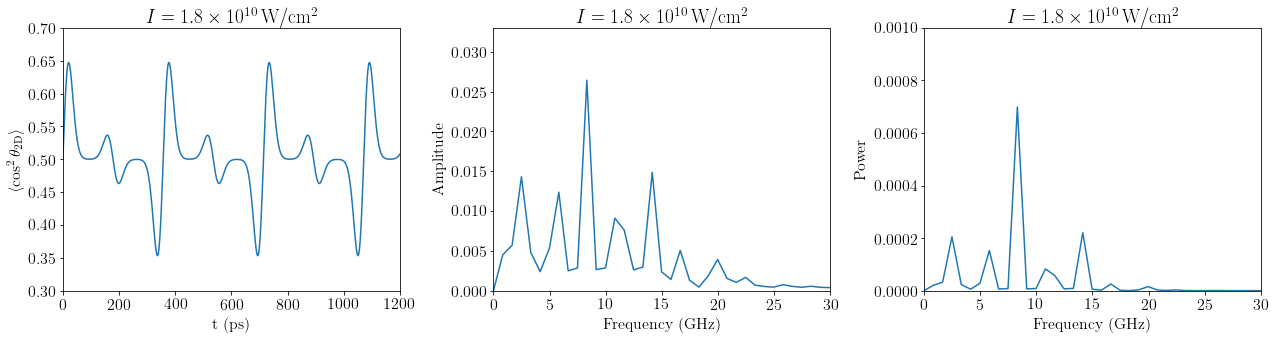

In [131]:
#cos2dAv = np.mean(ctr)+(ctr-np.mean(ctr))*np.exp(-trange/tdec)
cos2dAv=ctr
ml.rcParams['figure.figsize'] = (18.0, 5.0)
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.set_xlim([0,1200])
ax1.set_ylim([0.3,0.7])
ax1.plot(trange, cos2dAv)
ax1.set_ylabel(r'$\langle\cos^2\theta_\mathrm{2D}\rangle$')
ax1.set_xlabel(r't (ps)')
inda = np.arange(len(trange)) / len(trange)
dta = trange[1]-trange[0]
ax2.plot(inda[:]*1e3/dta,np.abs(np.fft.ifft(cos2dAv[:]-np.mean(cos2dAv))))
ax2.set_xlim([0,30])
ax2.set_ylim([0,3.3e-2])
ax2.set_xlabel('Frequency (GHz)')
ax2.set_ylabel('Amplitude')
ax3.plot(inda[:]*1e3/dta,np.abs(np.fft.ifft(cos2dAv[:]-np.mean(cos2dAv[:])))**2)
ax3.set_xlim([0,30])
ax3.set_ylim([0,1e-3])
ax3.set_xlabel('Frequency (GHz)')
ax3.set_ylabel('Power')
ax1.set_title(r'$I=1.8\times10^{10} \,\mathrm{W/cm^2}$')
ax2.set_title(r'$I=1.8\times10^{10} \,\mathrm{W/cm^2}$')
ax3.set_title(r'$I=1.8\times10^{10} \,\mathrm{W/cm^2}$')
plt.tight_layout()
#plt.savefig("K2Data.pdf")

In [136]:
ctr.shape

(120201,)

In [143]:
actr = np.array([trange, ctr]).T

In [145]:
pf

,0,1
0,-2.0,0.500000
1,-1.9,0.500000
2,-1.8,0.500000
3,-1.7,0.500000
4,-1.6,0.500000
...,...,...
12016,1199.6,0.507593
12017,1199.7,0.507665
12018,1199.8,0.507737
12019,1199.9,0.507809


In [146]:
pf.to_csv("K2Data.csv")

In [144]:
import pandas as pd
pf = pd.DataFrame(actr[::10])

In [14]:
cos2dAv = ctr
ml.rcParams['figure.figsize'] = (18.0, 5.0)
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.set_xlim([0,1200])
ax1.set_ylim([0.3,0.7])
ax1.plot(trange, cos2dAv)
ax1.set_ylabel(r'$\langle\cos^2\theta_\mathrm{2D}\rangle$')
ax1.set_xlabel(r't (ps)')
inda = np.arange(len(trange)) / len(trange)
dta = trange[1]-trange[0]
ax2.plot(inda[:-5]*1e3/dta,np.abs(np.fft.ifft(cos2dAv[:-5])))
ax2.set_xlim([2,100])
ax2.set_ylim([0,4.5e-2])
ax2.set_xlabel('Frequency (GHz)')
ax2.set_ylabel('Amplitude')
ax3.plot(inda[:-5]*1e3/dta,np.abs(np.fft.ifft(cos2dAv[:-5]))**2)
ax3.set_xlim([2,100])
ax3.set_ylim([0,1.5e-3])
ax3.set_xlabel('Frequency (GHz)')
ax3.set_ylabel('Power')
ax1.set_title(r'$I=4.4\times10^{10} \,\mathrm{W/cm^2}$')
ax2.set_title(r'$I=4.4\times10^{10} \,\mathrm{W/cm^2}$')
ax3.set_title(r'$I=4.4\times10^{10} \,\mathrm{W/cm^2}$')
plt.tight_layout()
plt.savefig("Na2DataNegMFocal.pdf")

NameError: name 'ctr' is not defined

(0.0, 1.5)

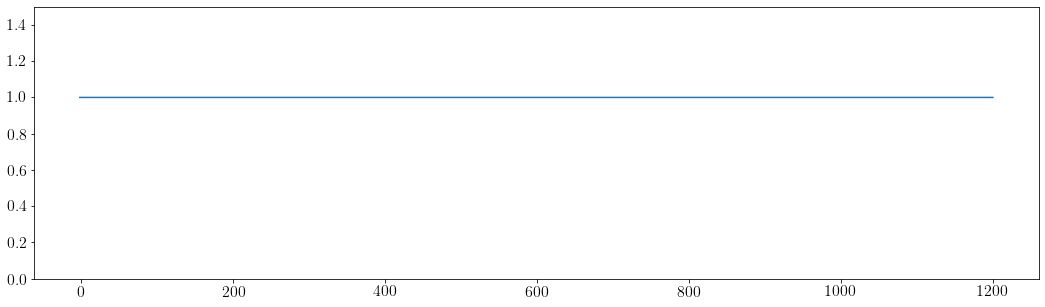

In [25]:
z = ctr[1]
z = np.real(np.array([np.dot(np.conj(z[il]), z.T[:,il]) for il in range(ctr[1].shape[0])]))
plt.plot(ctr[0], np.real(z))
plt.ylim([0,1.5])

/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.


(0.0, 10.0)

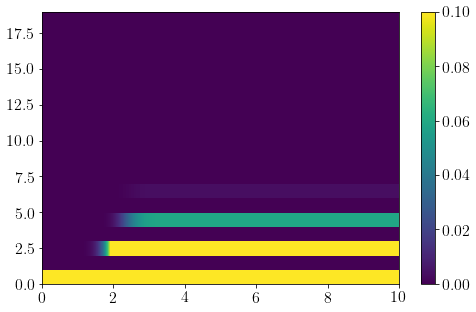

In [65]:
mlf = np.arange(0, mmax, 1)
z = ctr[1]
z = np.kron(z, np.array([1,0]))
plt.pcolormesh(ctr[0], mlf, np.abs(z.T)**2, vmax =0.1)
plt.colorbar()
plt.xlim([0,10])

(0.0, 600.0)

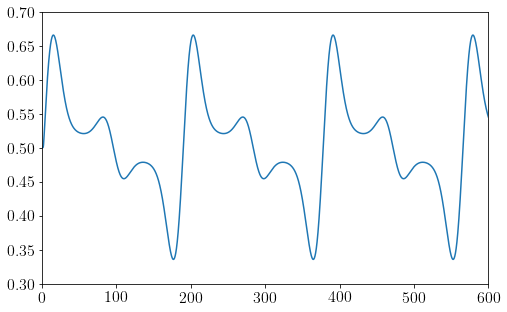

In [77]:
plt.plot(trange,ctr)
plt.ylim([0.3,0.7])
plt.xlim([0,600])

(0.0, 1200.0)

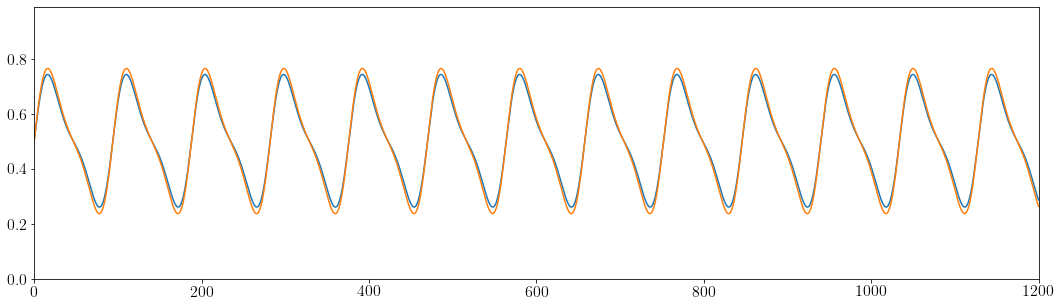

In [43]:
cosMat = 0.5 * diag + 0.25 * nondiag
z1 = z.copy()
z = ctr[1]
zr = np.dot(cosMat, z.T)
z = np.real(np.array([np.dot(np.conj(ctr[1][il]), zr[:,il]) for il in range(ctr[1].shape[0])]))
plt.plot(trange, np.real(z1))
plt.plot(trange, np.real(z))
plt.ylim([0.0,0.99])
plt.xlim([0,1200])

(0.0, 0.001)

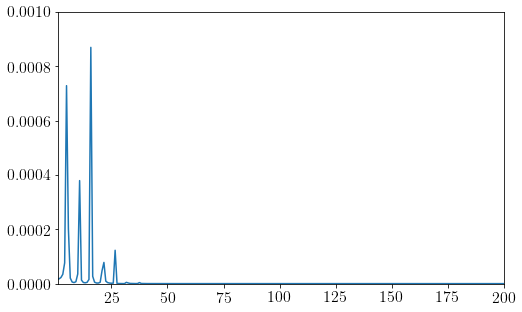

In [73]:
inda = np.arange(len(trange)) / len(trange)
dta = trange[1]-trange[0]
plt.plot(inda[:]*1e3/dta,np.abs(np.fft.ifft(np.real(ctr)))**2)
plt.xlim([1,200])
plt.ylim([0,0.001])

In [84]:
sy = np.array([[0, 1], [-1, 0]])

def ft(t, ct, B, I0, t0, tau, dal, alp, gamma):
    Il = It(I0, t0, tau, t)
    if (np.abs(t - t0) > 1.5 * tau):
        Hmat = B*Hkin
    else:
        Il = It(I0, t0, tau, t)
        Hmat = B*Hkin - Il * alp * np.cos(gamma)**2 * diag - (Il * dal * np.cos(gamma)**2 / 4) * nondiag
    return np.dot(np.kron(Hmat, sy), ct)

In [85]:
ct0 = np.zeros(mmax)
ct0[0] = 1

In [86]:
t = ctr[0]
res = solve_ivp(ft, [t[0], t[-1]], ct0, args=(B, Ir, t0, tau, dal, alp, 0.0), first_step = 0.001, t_eval=t,method='BDF')

KeyboardInterrupt: 

In [ ]:
cosMat = 0.5 * diag + 0.25 * nondiag
z = res.y
z = z[::2]+z[1::2]*1j
zr = np.dot(cosMat, z)
z = np.diagonal(np.dot(np.conj(z.T), zr))
plt.plot(t, np.real(z))

(0.0, 50.0)

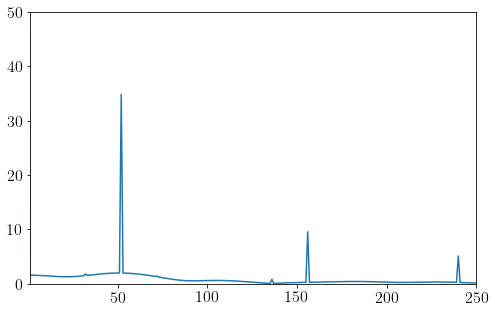

In [128]:
plt.plot(np.abs(np.fft.fft(z)))
plt.xlim([1,250])
plt.ylim([0,50])